In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#define path 
file_path = '/home/user/Desktop/raw data/raw_analyst_ratings.csv'

#read csv data

data = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

In [5]:
#Display basic statistical information

data['headline_length'] = data['headline'].apply(len)


dat

In [6]:
# Display statistics for headline lengths

print(data.describe())

         Unnamed: 0  headline_length
count  1.407328e+06     1.407328e+06
mean   7.072454e+05     7.312051e+01
std    4.081009e+05     4.073531e+01
min    0.000000e+00     3.000000e+00
25%    3.538128e+05     4.700000e+01
50%    7.072395e+05     6.400000e+01
75%    1.060710e+06     8.700000e+01
max    1.413848e+06     5.120000e+02


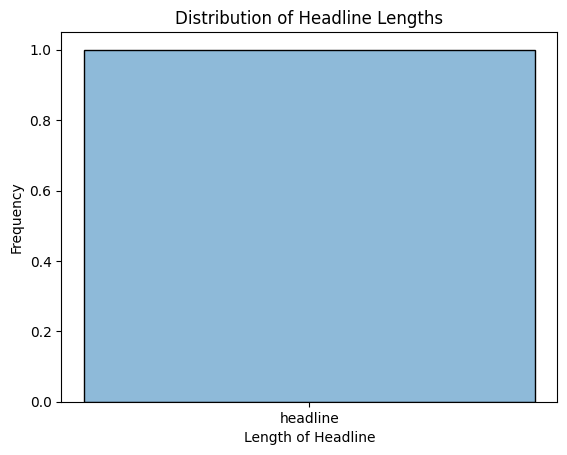

In [ ]:
# Visualize the distribution of headline lengths

sns.histplot(data=['headline'], kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Count the number of articles per publisher

publisher_counts = data['publisher'].value_counts()

print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


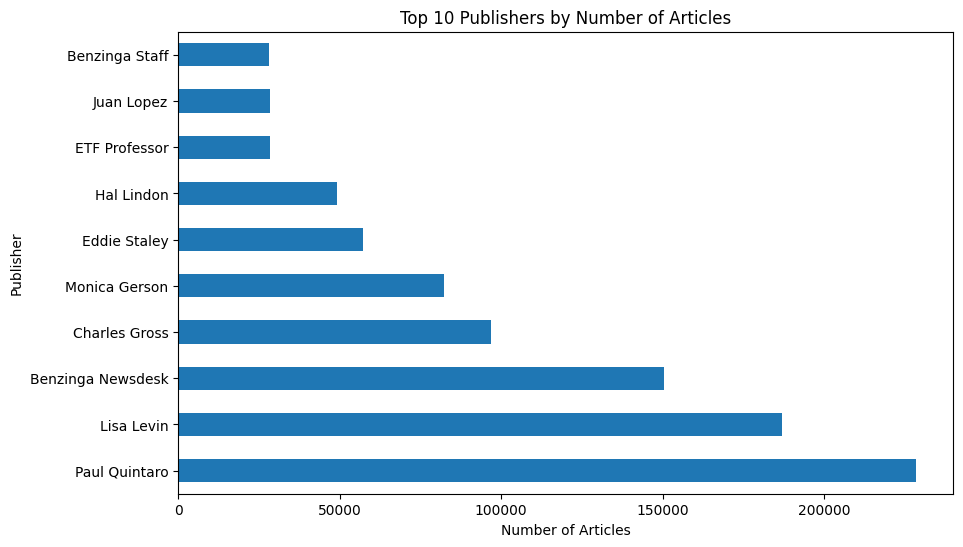

In [ ]:
# Visualize the top 10 publishers

publisher_counts.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

In [8]:
#convert date format to date and time
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Check the conversion
print(data['date'].head())

0   2020-05-06 10:30:54-04:00
1   2020-03-06 10:45:20-04:00
2                         NaT
3                         NaT
4                         NaT
Name: date, dtype: datetime64[ns, UTC-04:00]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype                    
---  ------           --------------    -----                    
 0   Unnamed: 0       1407328 non-null  int64                    
 1   headline         1407328 non-null  object                   
 2   url              1407328 non-null  object                   
 3   publisher        1407328 non-null  object                   
 4   date             25021 non-null    datetime64[ns, UTC-04:00]
 5   stock            1407328 non-null  object                   
 6   headline_length  1407328 non-null  int64                    
dtypes: datetime64[ns, UTC-04:00](1), int64(2), object(4)
memory usage: 75.2+ MB


In [9]:
#Group by date to see trends over time
date_counts = data.groupby(data['date'].dt.date).size()

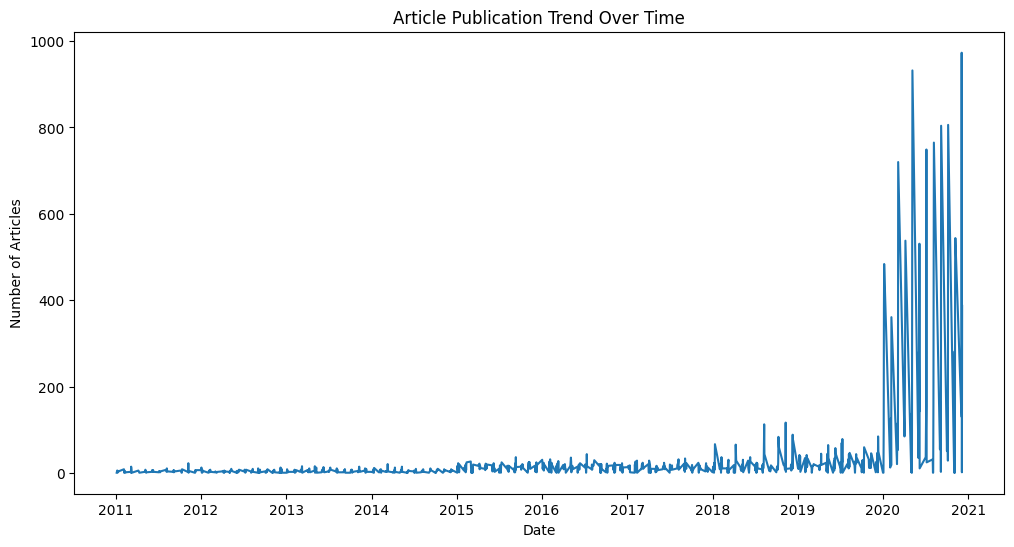

In [ ]:
# Plot the trends
date_counts.plot(kind='line', figsize=(12, 6))
plt.title('Article Publication Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

sentiment_class
Neutral     741200
Positive    441852
Negative    224276
Name: count, dtype: int64


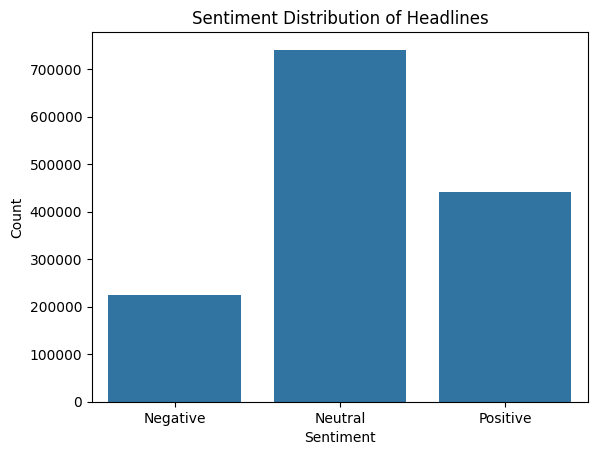

In [10]:
#perform sentiment analysis on headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
#Download VADER lexicon for sentiment analysis
#nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
data['sentiment'] = data['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
data['sentiment_class'] = pd.cut(data['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Display sentiment distribution
print(data['sentiment_class'].value_counts())

# Visualize the sentiment distribution
sns.countplot(data=data, x='sentiment_class')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
#Perform topic modeling using natural language processing (NLP):
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
headline_matrix = vectorizer.fit_transform(data['headline'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(headline_matrix)

# Display the top words in each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))

KeyboardInterrupt: 

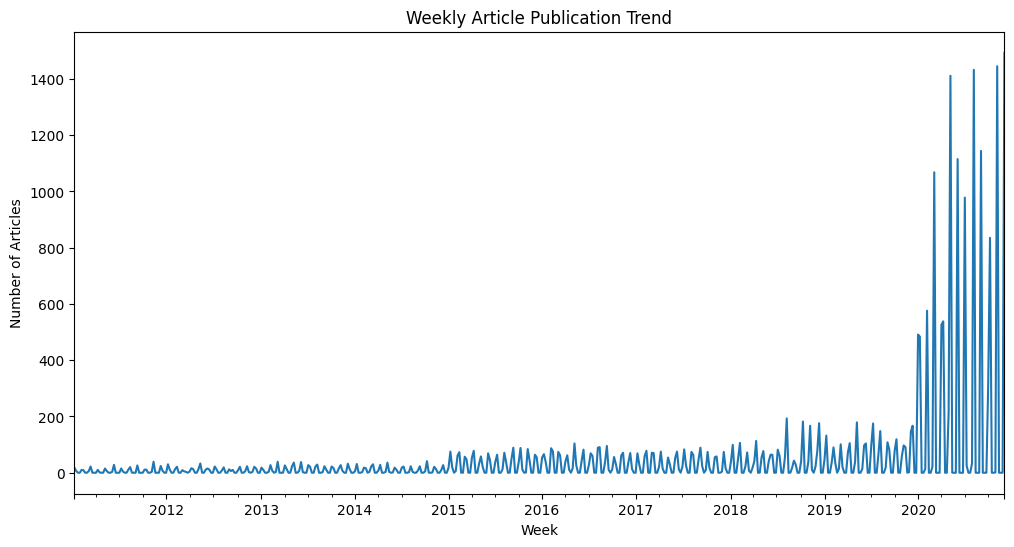

In [12]:
#Time Series Analysis to analyze how publication frequency varies over time:
# Resample by week or month to see trends

weekly_counts = data.resample('W', on='date').size()

# Plot the weekly publication trend
weekly_counts.plot(kind='line', figsize=(12, 6))
plt.title('Weekly Article Publication Trend')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.show()

In [16]:
 #Publisher Analysis
 print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


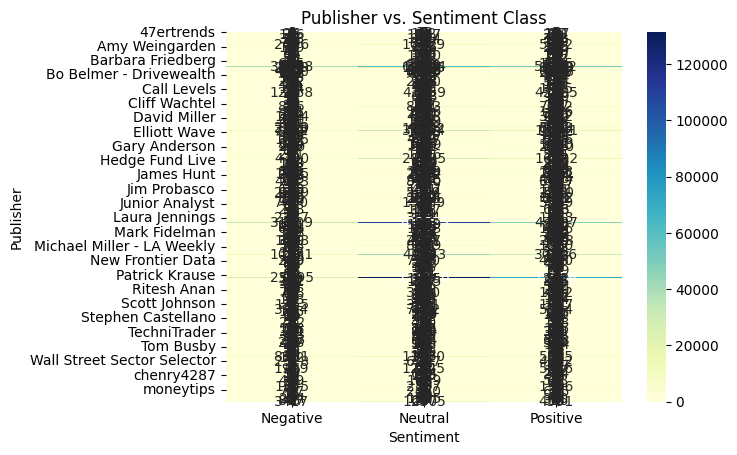

In [17]:
#Analyze if there’s a difference in the type of news reported by different publishers:

publisher_sentiment = pd.crosstab(data['publisher'], data['sentiment_class'])

# Visualize with a heatmap
sns.heatmap(publisher_sentiment, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Publisher vs. Sentiment Class')
plt.xlabel('Sentiment')
plt.ylabel('Publisher')
plt.show()